In [ ]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
df.columns

Index(['unnamed:_0', 'clothing_id', 'age', 'title', 'review_text', 'rating',
       'recommended_ind', 'positive_feedback_count', 'division_name',
       'department_name', 'class_name'],
      dtype='object')

In [ ]:
df = df[['review_text']]


In [ ]:
df.dropna(inplace=True)

df = df.reset_index(drop=True)
df = df.head(10000)

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def pre_process_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(lemmatized_tokens)

df['review_text'] = df['review_text'].apply(pre_process_text)

In [ ]:
from bertopic import BERTopic

# Initialize the BERTopic model
topic_model = BERTopic()

# Fit the model on the feedback data
topics, probs = topic_model.fit_transform(df['review_text'])

print(topic_model.get_topic_info())

print(topic_model.get_topic(0))


    Topic  Count                            Name  \
0      -1    326          -1_color_size_wear_fit   
1       0    206         0_dress_fit_size_fabric   
2       1     89           1_top_like_love_would   
3       2     61          2_skirt_waist_color_nt   
4       3     58        3_sweater_coat_wool_soft   
5       4     37            4_pant_like_black_re   
6       5     34           5_blouse_great_top_nt   
7       6     31      6_jacket_sweater_small_arm   
8       7     30          7_jean_pilcro_fit_size   
9       8     23        8_jacket_coat_love_great   
10      9     21       9_shirt_love_bought_color   
11     10     17     10_tunic_black_love_perfect   
12     11     16       11_legging_grey_moss_soft   
13     12     13    12_fabric_pattern_nice_color   
14     13     13  13_shirt_ordered_beautiful_way   
15     14     13  14_suit_swimsuit_bathing_beach   
16     15     12      15_bra_chest_support_would   

                                       Representation  \
0   [c

In [ ]:
topic_model.visualize_topics()


Topic -1


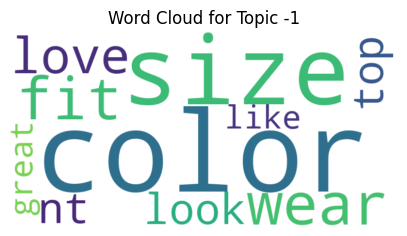

Topic 0


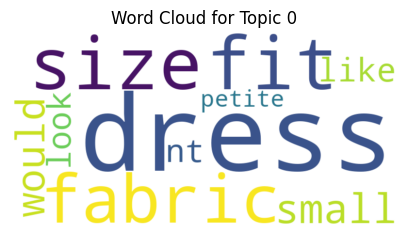

Topic 1


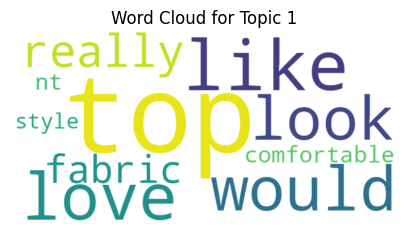

Topic 2


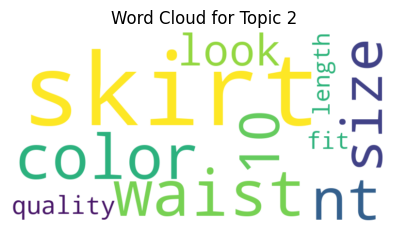

Topic 3


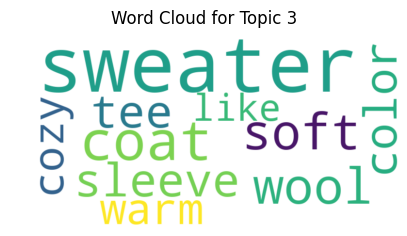

Topic 4


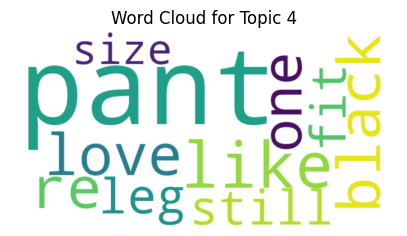

Topic 5


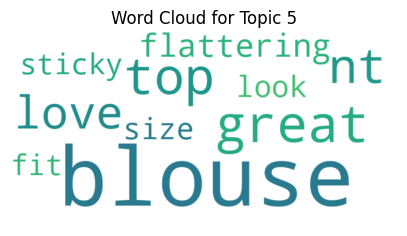

Topic 6


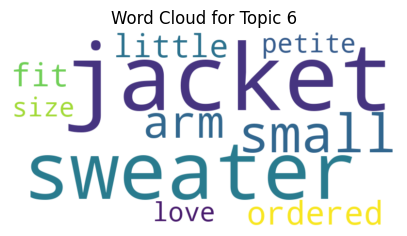

Topic 7


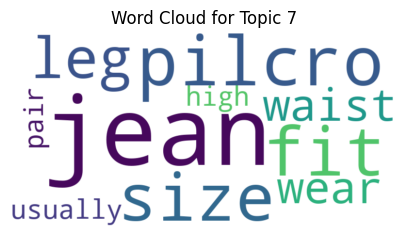

Topic 8


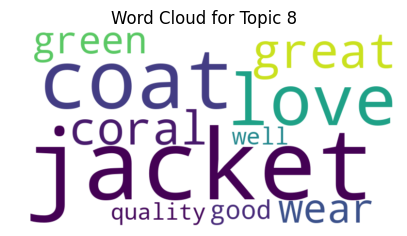

Topic 9


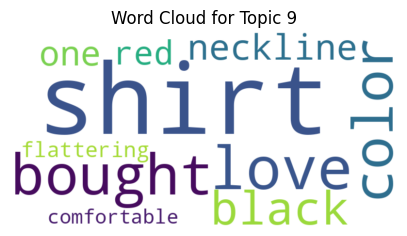

Topic 10


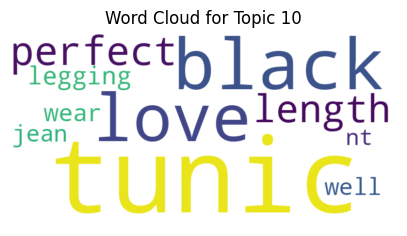

Topic 11


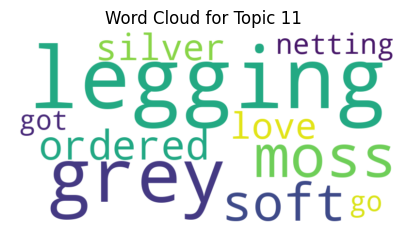

Topic 12


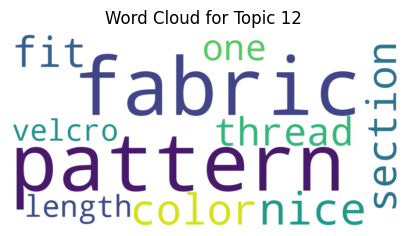

Topic 13


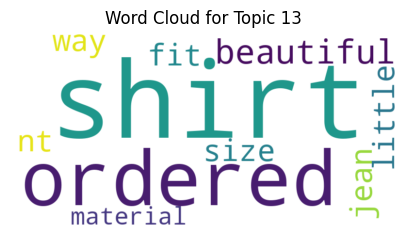

Topic 14


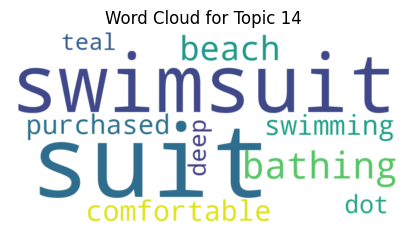

Topic 15


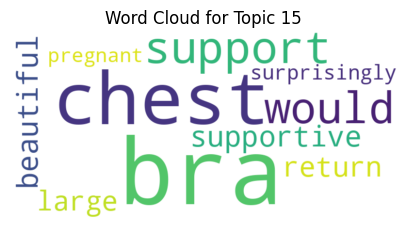

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx in topic_model.get_topics().keys():
    print(f'Topic {topic_idx}')
    words_dict = dict(topic_model.get_topic(topic_idx))  # Get the words for the topic

    # Generate a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(words_dict)

    # Plot the word cloud
    plt.figure(figsize=(5, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Topic {topic_idx}")
    plt.show()
